In [17]:
from google.colab.patches import cv2_imshow
import numpy as np


In [6]:
!unzip -o /content/tsukuba.zip -d /content/tsukuba
!unzip -o /content/Aloe_images.zip -d /content/Aloe

Archive:  /content/tsukuba.zip
mapname:  conversion of  failed
 extracting: /content/tsukuba/left.png  
 extracting: /content/tsukuba/right.png  
 extracting: /content/tsukuba/groundtruth.png  
Archive:  /content/Aloe_images.zip
  inflating: /content/Aloe/Aloe/Aloe_left_1.png  
  inflating: /content/Aloe/Aloe/Aloe_right_3.png  
  inflating: /content/Aloe/Aloe/Aloe_right_1.png  
  inflating: /content/Aloe/Aloe/Aloe_right_2.png  
  inflating: /content/Aloe/Aloe/Disparity_map_corr.png  


In [7]:
def l1_distance(x, y):
    return abs(x-y)

def l2_distance(x, y):
    return (x-y)**2

In [15]:
def pixel_wise_matching_l1(left_img, right_img, disparity_range, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255

    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min  = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 \
                                else l1_distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min  = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'pixel_wise_l1.png', depth)
        cv2.imwrite(f'pixel_wise_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET)

In [22]:
def pixel_wise_matching_l2(left_img, right_img, disparity_range, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255 ** 2

    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min  = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 else l2_distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min  = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'pixel_wise_l2.png', depth)
        cv2.imwrite(f'pixel_wise_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')
    # Return both depth and color mapped depth
    return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET)

In [9]:
left_img_path = 'tsukuba/left.png'
right_img_path = 'tsukuba/right.png'
disparity_range = 16


Saving result...
Done.


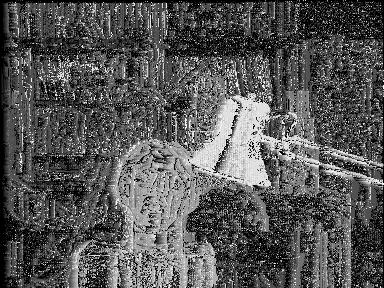

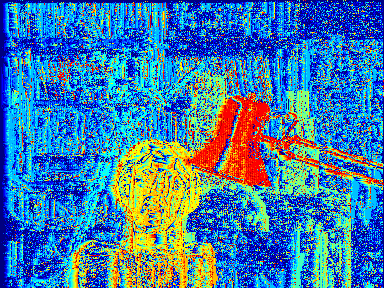

In [18]:
depth, color = pixel_wise_matching_l1(left_img_path, right_img_path, disparity_range, save_result=True)
cv2_imshow(depth)
cv2_imshow(color)

Saving result...
Done.


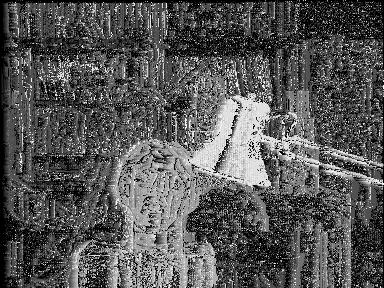

In [23]:
depth, color = pixel_wise_matching_l2(left_img_path, right_img_path, disparity_range, save_result=True)
cv2_imshow(depth)